# ELCO 와 연관성이 높을 유의미한 데이터를 찾아보자!

## 0. 데이터 가져오기
- train.csv
- test.csv
- countrywide_accident
- 대구 CCTV 정보
- 대구 보안등 정보
- 대구 어린이 보호 구역 정보
- 대구 주차장 정보

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc 

FONT_PATH = '/usr/share/fonts/d2coding/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'
font_name=font_manager.FontProperties(fname=FONT_PATH).get_name() 
rc('font',family=font_name)

In [3]:
ROOT_DATA_PATH = "../../data/01"

df_train = pd.read_csv(f"{ROOT_DATA_PATH}/train.csv")
df_test = pd.read_csv(f"{ROOT_DATA_PATH}/test.csv")
df_c_a = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/countrywide_accident.csv")
df_cctv = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/대구 CCTV 정보.csv", encoding='cp949')
df_light = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/대구 보안등 정보.csv", encoding='cp949')
df_child = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/대구 어린이 보호 구역 정보.csv", encoding='cp949')
df_parking = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/대구 주차장 정보.csv", encoding='cp949')

/tmp/ipykernel_41107/2299376178.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_light = pd.read_csv(f"{ROOT_DATA_PATH}/external_open/대구 보안등 정보.csv", encoding='cp949')


### TRAIN CSV 와 TEST CSV 확인
- train csv 에는 가해자, 피해자에 관한 내용이 포함되어있는 반면, test csv 는 해당 컬럼들이 모두 빠져있다.
- 시공간 데이터를 최대한 활용한다.

In [4]:
df_train.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [5]:
df_test.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [8]:
len(df_train.head(0).value_counts())

0

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


In [11]:
df_test.head(3)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차


In [32]:
df_test['도로형태'].value_counts()

도로형태
단일로 - 기타           5039
교차로 - 교차로안         2540
교차로 - 교차로부근        1673
기타 - 기타             752
교차로 - 교차로횡단보도내      480
단일로 - 지하차도(도로)내     273
단일로 - 교량             74
주차장 - 주차장            64
단일로 - 고가도로위          52
단일로 - 터널             15
미분류 - 미분류             1
Name: count, dtype: int64

In [34]:
df_train['도로형태'].value_counts()

도로형태
단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64

In [35]:
df_train['시군구'].value_counts()

시군구
대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: count, Length: 199, dtype: int64

In [33]:
df_test['시군구'].value_counts()

시군구
대구광역시 남구 대명동      422
대구광역시 수성구 범어동     351
대구광역시 달서구 상인동     315
대구광역시 수성구 만촌동     277
대구광역시 북구 산격동      264
                 ... 
대구광역시 북구 고성동1가      1
대구광역시 동구 능성동        1
대구광역시 중구 화전동        1
대구광역시 중구 서문로2가      1
대구광역시 중구 동성로1가      1
Name: count, Length: 192, dtype: int64

In [30]:
df_train.loc[df_train['노면상태']=='건조']['기상상태'].value_counts()


기상상태
맑음    35951
흐림      419
기타       50
Name: count, dtype: int64

### CCTV

In [12]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  1065 non-null   object 
 1   시도명            1065 non-null   object 
 2   시군구명           1065 non-null   object 
 3   도로종류           1065 non-null   object 
 4   도로노선번호         288 non-null    object 
 5   도로노선명          1065 non-null   object 
 6   도로노선방향         1065 non-null   int64  
 7   소재지도로명주소       905 non-null    object 
 8   소재지지번주소        1063 non-null   object 
 9   위도             1065 non-null   float64
 10  경도             1065 non-null   float64
 11  설치장소           1065 non-null   object 
 12  단속구분           1065 non-null   int64  
 13  제한속도           1065 non-null   int64  
 14  단속구간위치구분       53 non-null     float64
 15  과속단속구간길이       26 non-null     float64
 16  보호구역구분         893 non-null    float64
 17  설치연도           1065 non-null   float64
dtypes: float

In [13]:
df_cctv.head(3)

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0


In [14]:
df_cctv['단속구분'].value_counts()

단속구분
2     575
4     232
1     207
99     51
Name: count, dtype: int64

## 1. Tain 

In [3]:
df_child

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01


In [40]:
df_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71913 entries, 0 to 71912
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   보안등위치명    71913 non-null  object 
 1   설치개수      71913 non-null  int64  
 2   소재지도로명주소  34646 non-null  object 
 3   소재지지번주소   71913 non-null  object 
 4   위도        43602 non-null  float64
 5   경도        43602 non-null  float64
 6   설치연도      29397 non-null  float64
 7   설치형태      35373 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


In [41]:
df_light.isna().sum() # 소재지 도로명과 설치형태, 두 컬럼의 dtype 이 Object(str) 그리고 NaN 이 섞여있음

보안등위치명          0
설치개수            0
소재지도로명주소    37267
소재지지번주소         0
위도          28311
경도          28311
설치연도        42516
설치형태        36540
dtype: int64

In [42]:
df_light.loc[df_light['소재지도로명주소'].isna()]

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
7203,감삼동-005,1,NaN,대구광역시 달서구 감삼동 180-1,35.846632,128.539363,2011.0,NaN
7205,감삼동-007,1,NaN,대구광역시 달서구 감삼동 295-8,35.845282,128.542785,2011.0,NaN
7219,두류1동-005,1,NaN,대구광역시 달서구 두류동 1108-11,35.861793,128.574056,2000.0,NaN
7227,두류1동-013,1,NaN,대구광역시 달서구 두류동 1210-26,35.859999,128.574110,2000.0,NaN
7232,도원동-002,1,NaN,대구광역시 달서구 도원동 1396-92,35.807901,128.545396,2000.0,NaN
...,...,...,...,...,...,...,...,...
71908,대봉2동 165-9,1,NaN,대구광역시 중구 대봉동 165-9,35.857556,128.600023,NaN,한전주
71909,대봉2동 88-85,1,NaN,대구광역시 중구 대봉동 88-85,35.859205,128.600046,NaN,한전주
71910,대봉2동 719-20,1,NaN,대구광역시 중구 대봉동 719-20,35.859442,128.599627,NaN,한전주
71911,대봉2동 738-13,1,NaN,대구광역시 중구 대봉동 738-13,35.858244,128.597614,2010.0,건축물


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [44]:
df_train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [45]:
df_train.loc[(df_train['시군구'] == '대구광역시 수성구 두산동')].iloc[:,11:]

,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
2,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
158,여,45세,상해없음,승용,남,41세,중상,0,1,0,0,5
353,여,33세,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
452,남,79세,상해없음,이륜,남,26세,경상,0,0,1,0,3
556,남,63세,상해없음,승용,여,47세,상해없음,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
39322,남,63세,상해없음,이륜,남,63세,중상,0,1,0,0,5
39401,남,79세,상해없음,이륜,남,24세,경상,0,0,1,0,3
39475,남,24세,상해없음,승합,남,53세,경상,0,0,1,0,3
39552,남,52세,기타불명,이륜,남,22세,경상,0,0,1,0,3


In [46]:
df_train.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [47]:
df_train.loc[df_train['피해운전자 성별'].isna()]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,NaN,NaN,NaN,NaN,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,ACCIDENT_39436,2021-12-27 00,월요일,맑음,대구광역시 수성구 삼덕동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
39437,ACCIDENT_39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
39497,ACCIDENT_39497,2021-12-28 17,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
39508,ACCIDENT_39508,2021-12-29 09,수요일,맑음,대구광역시 달서구 두류동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1


In [53]:
df_mi = df_train.loc[df_train['가해운전자 연령'] == '미분류']
df_mi

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
11,ACCIDENT_00011,2019-01-01 14,화요일,맑음,대구광역시 동구 신기동,교차로 - 교차로안,건조,차대차,기타,안전운전불이행,...,기타불명,자전거,남,69세,경상,0,0,1,0,3
38,ACCIDENT_00038,2019-01-02 15,수요일,맑음,대구광역시 서구 이현동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,기타불명,승용,남,32세,부상신고,0,0,0,1,1
83,ACCIDENT_00083,2019-01-03 20,목요일,맑음,대구광역시 북구 태전동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,기타불명,자전거,남,66세,중상,0,1,0,0,5
145,ACCIDENT_00145,2019-01-05 17,토요일,맑음,대구광역시 북구 산격동,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,기타불명,보행자,남,36세,경상,0,0,1,0,3
186,ACCIDENT_00186,2019-01-07 02,월요일,맑음,대구광역시 달서구 진천동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,기타불명,사륜오토바이(ATV),남,56세,부상신고,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39486,ACCIDENT_39486,2021-12-28 13,화요일,맑음,대구광역시 달서구 진천동,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,기타불명,보행자,여,64세,경상,0,0,1,0,3
39518,ACCIDENT_39518,2021-12-29 16,수요일,맑음,대구광역시 수성구 범어동,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,기타불명,보행자,여,13세,경상,0,0,1,0,3
39540,ACCIDENT_39540,2021-12-30 11,목요일,맑음,대구광역시 수성구 범어동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,기타불명,승합,남,35세,상해없음,0,0,1,0,3
39578,ACCIDENT_39578,2021-12-31 12,금요일,맑음,대구광역시 달성군 구지면,단일로 - 기타,건조,차대차,기타,안전거리미확보,...,기타불명,이륜,남,30세,경상,0,0,1,0,3


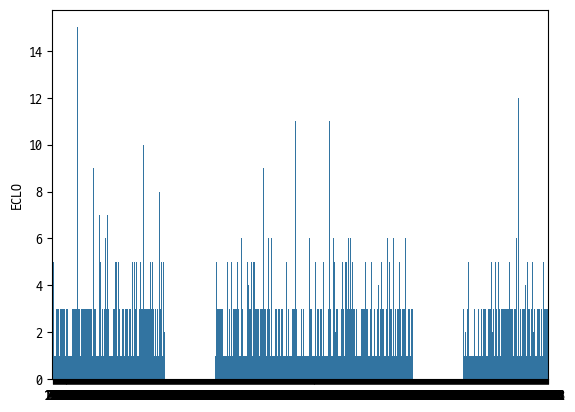

In [66]:
sns.barplot(df_mi['ECLO'].sort_values())
plt.show()

In [58]:
df_mi['도로형태'].value_counts()

도로형태
단일로 - 기타           560
교차로 - 교차로안         150
교차로 - 교차로부근        116
기타 - 기타             98
교차로 - 교차로횡단보도내      48
단일로 - 교량             7
주차장 - 주차장            6
단일로 - 지하차도(도로)내      4
단일로 - 고가도로위          3
단일로 - 터널             1
미분류 - 미분류            1
Name: count, dtype: int64

<Axes: xlabel='사고일시', ylabel='count'>

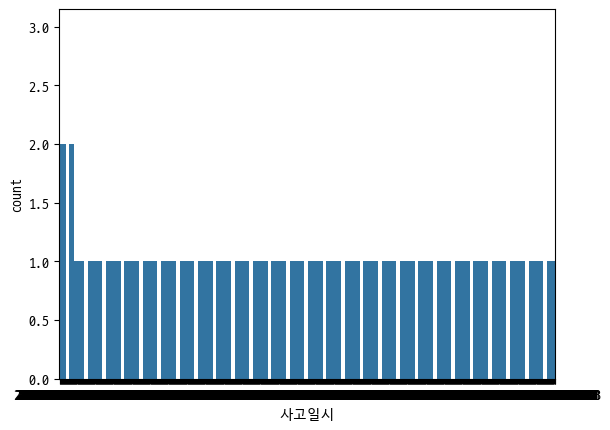

In [57]:
sns.barplot(df_mi['사고일시'].value_counts())

In [14]:
df_train.loc[df_train['피해운전자 성별'].isna()]['사고유형'].value_counts()

사고유형
차량단독    991
Name: count, dtype: int64

In [32]:
df_train.loc[df_train['사고유형'] == '차량단독']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,NaN,NaN,NaN,NaN,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,ACCIDENT_39436,2021-12-27 00,월요일,맑음,대구광역시 수성구 삼덕동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
39437,ACCIDENT_39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
39497,ACCIDENT_39497,2021-12-28 17,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
39508,ACCIDENT_39508,2021-12-29 09,수요일,맑음,대구광역시 달서구 두류동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1


In [33]:
df_train.loc[df_train['사고유형'] == '차량단독']['ECLO'].mean()

4.006054490413724

In [86]:
df_train['사고유형'].value_counts()

사고유형
차대차     31785
차대사람     6833
차량단독      991
Name: count, dtype: int64

In [ ]:
df_train.loc[df_train['']]

In [84]:
train_testing = df_train.copy()
train_testing['도로'] = train_testing['도로형태'].map(lambda x: x.split(' - ')[0])
# train_testing['도로'] = train_testing['기상상태'] == "맑음"

In [85]:
pd.get_dummies(train_testing[['도로', '사망자수', '중상자수', '부상자수', 'ECLO']]).corr()

,사망자수,중상자수,부상자수,ECLO,도로_교차로,도로_기타,도로_단일로,도로_미분류,도로_주차장
사망자수,1.000000,-0.004368,-0.022771,0.218507,-0.012082,-0.008272,0.016651,-0.001227,-0.006681
중상자수,-0.004368,1.000000,-0.105167,0.464520,0.040102,-0.017799,-0.029154,-0.003898,-0.017632
부상자수,-0.022771,-0.105167,1.000000,-0.118713,0.002212,-0.010832,0.002146,-0.000067,0.002543
ECLO,0.218507,0.464520,-0.118713,1.000000,0.042392,-0.047334,-0.017476,-0.004328,-0.024396
도로_교차로,-0.012082,0.040102,0.002212,0.042392,1.000000,-0.200781,-0.892786,-0.012421,-0.067657
도로_기타,-0.008272,-0.017799,-0.010832,-0.047334,-0.200781,1.000000,-0.234721,-0.003266,-0.017788
도로_단일로,0.016651,-0.029154,0.002146,-0.017476,-0.892786,-0.234721,1.000000,-0.014520,-0.079094
도로_미분류,-0.001227,-0.003898,-0.000067,-0.004328,-0.012421,-0.003266,-0.014520,1.000000,-0.001100
도로_주차장,-0.006681,-0.017632,0.002543,-0.024396,-0.067657,-0.017788,-0.079094,-0.001100,1.000000


## 대구 빅데이터 마트 데이터 확인

In [17]:
# !pip install geopandas

In [22]:
import geopandas as gpd
data = gpd.read_file("../data/01/external_open/대구 빅데이터 마트 데이터/7. 안전/8. 결빙사고 다발지역/결빙사고 다발지역 _100.gpkg")
data.head()

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077102.303 1745692.817, 10771..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077057.173 1745639.546, 10770..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077051.871 1745538.189, 10770..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077049.547 1745487.411, 10771..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077044.105 1745368.495, 10770..."


In [23]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             30 non-null     float64 
 2   occrrnc_cnt_sum   30 non-null     float64 
 3   occrrnc_cnt_mean  30 non-null     float64 
 4   caslt_cnt_sum     30 non-null     float64 
 5   caslt_cnt_mean    30 non-null     float64 
 6   dth_dnv_cnt_sum   30 non-null     float64 
 7   dth_dnv_cnt_mean  30 non-null     float64 
 8   se_dnv_cnt_sum    30 non-null     float64 
 9   se_dnv_cnt_mean   30 non-null     float64 
 10  sl_dnv_cnt_sum    30 non-null     float64 
 11  sl_dnv_cnt_mean   30 non-null     float64 
 12  wnd_dnv_cnt_sum   30 non-null     float64 
 13  wnd_dnv_cnt_mean  30 non-null     float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [8]:
import geopandas as gpd
data_2 = gpd.read_file("../../data/01/external_open/대구 빅데이터 마트 데이터/5. 통행/3. 도로정보 및 교통량(합계, 시간대별)/교통데이터_시간대별/교통데이터_시간대별_100.gpkg", en)
data_2.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 0: invalid start byte

In [25]:
data_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                10204 non-null  int64   
 1   count             8 non-null      float64 
 2   occrrnc_cnt_sum   8 non-null      float64 
 3   occrrnc_cnt_mean  8 non-null      float64 
 4   caslt_cnt_sum     8 non-null      float64 
 5   caslt_cnt_mean    8 non-null      float64 
 6   dth_dnv_cnt_sum   8 non-null      float64 
 7   dth_dnv_cnt_mean  8 non-null      float64 
 8   se_dnv_cnt_sum    8 non-null      float64 
 9   se_dnv_cnt_mean   8 non-null      float64 
 10  sl_dnv_cnt_sum    8 non-null      float64 
 11  sl_dnv_cnt_mean   8 non-null      float64 
 12  wnd_dnv_cnt_sum   8 non-null      float64 
 13  wnd_dnv_cnt_mean  8 non-null      float64 
 14  geometry          10204 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 1.2 MB


In [2]:
import pandas as pd

In [5]:
df1 = pd.read_csv('../../data/01/train.csv')
df2 = pd.read_csv('../../data/01/external_open/countrywide_accident.csv')
df = pd.concat([df1, df2]).reset_index()
df

,index,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642379,602770,COUNTRYWIDE_ACCIDENT_602770,2021-12-31 23,금요일,흐림,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,기타,...,상해없음,승합,남,52세,상해없음,0,1,1,0,8
642380,602771,COUNTRYWIDE_ACCIDENT_602771,2021-12-31 23,금요일,맑음,서울특별시 성동구 행당동,단일로 - 기타,건조,차대차,측면충돌,...,상해없음,승용,남,71세,경상,0,0,2,0,6
642381,602772,COUNTRYWIDE_ACCIDENT_602772,2021-12-31 23,금요일,맑음,대전광역시 유성구 원신흥동,교차로 - 교차로안,건조,차대차,측면충돌,...,상해없음,승용,남,56세,경상,0,0,3,0,9
642382,602773,COUNTRYWIDE_ACCIDENT_602773,2021-12-31 23,금요일,맑음,경기도 화성시 서신면,기타 - 기타,젖음/습기,차량단독,기타,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1


In [6]:
df.to_csv('../main/data/origin/train.csv')